In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from copy import deepcopy
from scipy.integrate import quad as integrate

In [2]:
def Boys(T, m):
    def boys_int_func( t, T, m ):
        return t**(2*m) * np.exp(-T*t**2)
    ret, _ = integrate( boys_int_func, 0, 1, args=(T,m) )
    return ret

class orb:
    def __init__(self,la,lb,lc,ld):
        self.la = la
        self.lb = lb
        self.lc = lc
        self.ld = ld
        self.l  = la+lb+lc+ld
        self.l2 = self.la**2+self.lb**2+self.lc**2+self.ld**2
        if self.l == 0:
            self.s = 0.
        elif self.l == 1:
            self.x = 0.
            self.y = 0.
            self.z = 0.
        elif self.l == 2 and self.l2 == 2:
            self.xx = 0.
            self.xy = 0.
            self.xz = 0.
            self.yx = 0.
            self.yy = 0.
            self.yz = 0.
            self.zx = 0.
            self.zy = 0.
            self.zz = 0.
    def __repr__(self):
        ret = "("
        if self.l == 0:
            ret += str(self.s) + " "
        elif self.l == 1:
            ret += str(self.x) + " "
            ret += str(self.y) + " "
            ret += str(self.z) + " "
        elif self.l == 2 and self.l2 == 2:
            ret += str(self.xx) + " "
            ret += str(self.xy) + " "
            ret += str(self.xz) + " "
            ret += str(self.yx) + " "
            ret += str(self.yy) + " "
            ret += str(self.yz) + " "
            ret += str(self.zx) + " "
            ret += str(self.zy) + " "
            ret += str(self.zz) + " "
        ret += ")\n"
        return ret
    
class sph:
    def __init__(self,la,lb,lc,ld):
        self.la = la
        self.lb = lb
        self.lc = lc
        self.ld = ld
        self.l  = la+lb+lc+ld
        self.l2 = self.la**2+self.lb**2+self.lc**2+self.ld**2
        if self.l == 0:
            self.c0 = 0.
        elif self.l == 1:
            self.c0 = 0.
            self.c1 = 0.
            self.c2 = 0.
        elif self.l == 2 and self.l2 == 2:
            self.c0 = 0.
            self.c1 = 0.
            self.c2 = 0.
            self.c3 = 0.
            self.c4 = 0.
            self.c5 = 0.
            self.c6 = 0.
            self.c7 = 0.
            self.c8 = 0.
    def __repr__(self):
        ret = "("
        if self.l == 0:
            ret += str(self.c0) + " "
        elif self.l == 1:
            ret += str(self.c0) + " "
            ret += str(self.c1) + " "
            ret += str(self.c2) + " "
        elif self.l == 2 and self.l2 == 2:
            ret += str(self.c0) + " "
            ret += str(self.c1) + " "
            ret += str(self.c2) + " "
            ret += str(self.c3) + " "
            ret += str(self.c4) + " "
            ret += str(self.c5) + " "
            ret += str(self.c6) + " "
            ret += str(self.c7) + " "
            ret += str(self.c8) + " "
        ret += ")\n"
        return ret
                

class vec:
    def __init__(self,x):
        self.x = x[0]
        self.y = x[1]
        self.z = x[2]
            
class Shell:
    def __init__(self, l_, np_, i_ ):
        self.l = l_
        self.np = np_
        self.i = i_
        self.R = np.zeros(shape = 3)
        self.z = np.zeros(shape = np_)
        self.k = np.zeros(shape = np_)
        
    def __repr__(self):
        ret =  " shell " + str(self.i) + " at " + str(self.R)  + "\n"
        ret += "      np: " + str(self.np) + "\n"
        ret += "      z: " + str(self.z) + "\n"
        ret += "      K: " + str(self.k) + "\n"
        return ret

def Knorm( z1,z2,R1,R2 ):
    return np.sqrt(2.) * (np.pi)**(5/4) / (z1+z2) * np.exp( - z1*z2/(z1+z2)*np.sum((R1-R2)**2) )

def compute_V( a,b,G, c,d,N, H, ipa,ipb,ipc,ipd):
    A = a.R
    B = b.R + G
    C = c.R + H
    D = d.R + N + H

    za = a.z[ipa]
    zb = b.z[ipb]
    zc = c.z[ipc]
    zd = d.z[ipd]
    
    ka = a.k[ipa]
    kb = b.k[ipb]
    kc = c.k[ipc]
    kd = d.k[ipd]

    zp  = za+zb
    zq  = zc+zd
    z   = zp+zq
    rho = zp*zq/z

    zp1 = 1./(2.*zp)
    zp2 = - rho/(2.*zp**2)
    zq1 = 1./(2.*zq)
    zq2 = - rho/(2.*zq**2)
    inv_2z = 1. / 2. / z

    P = ( za*A + zb*B ) / zp
    Q = ( zc*C + zd*D ) / zq
    W = ( zp*P + zq*Q ) / z
    
    PA = P - A
    QC = Q - C
    WQ = W - Q
    WP = W - P
    PQ = P - Q

    rpq2 = np.sum(PQ**2)
    T  = rho * rpq2
    K  = ka*kb*kc*kd
    K1 = Knorm( za,zb,A,B )
    K2 = Knorm( zc,zd,C,D )
    Kfac = K * K1 * K2 / np.sqrt(z)
    
    gp = 2.*za
    
#    print(T, A[0],B[0],C[0],D[0],P[0],Q[0],W, PA, WP , gp)
    
    return T, PA,WP,QC,WQ,zp1,zp2,zq1,zq2,inv_2z,Kfac,gp
    

def ssss_4c2e( a,b,G, c,d,N, H ):
    """ computes ssss """
    
    L = a.l + b.l + c.l + d.l
    assert( L == 0 )
    
    ret = 0
    for ipa in range(a.np):
        for ipb in range(b.np):
            for ipc in range(c.np):
                for ipd in range(d.np):

                    T, PA,WP,QC,WQ,zp1,zp2,zq1,zq2,inv_2z,Kfac,gp = compute_V(a,b,G, c,d,N, H, ipa,ipb,ipc,ipd)

                    F0 = Boys(T, 0) * Kfac

                    ret += F0
    return ret
    
def grad_ssss( a,b,G, c,d,N, H ):
    """ computes grad_Ra of ssss """
    
    L = a.l + b.l + c.l + d.l
    assert( L == 0 )
    
    ret = np.zeros(3)
    
    for ipa in range(a.np):
        for ipb in range(b.np):
            for ipc in range(c.np):
                for ipd in range(d.np):
                    
                    T, PA,WP,QC,WQ,zp1,zp2,zq1,zq2,inv_2z,Kfac,gp = compute_V(a,b,G, c,d,N, H, ipa,ipb,ipc,ipd)
                    
                    F0 = Boys(T, 0) * Kfac
                    F1 = Boys(T, 1) * Kfac

                    ssss0 = F0
                    ssss1 = F1
                    
                    psssx  = PA[0] * ssss0 + WP[0] * ssss1
                    psssy  = PA[1] * ssss0 + WP[1] * ssss1
                    psssz  = PA[2] * ssss0 + WP[2] * ssss1
                    
                    gx = gp * psssx # + fm * _sssx
                    gy = gp * psssy # + fm * _sssy
                    gz = gp * psssz # + fm * _sssz
                    
                    ret[0] += gx
                    ret[1] += gy
                    ret[2] += gz
    return ret


def exc_1324_ssss( a,b,G, c,d,N, H ):
    """ computes exchange """
    # ab(G)|c(H)d(N+H) -> ac(H)|b(G)d(N+H)
    # G' -> H   ;  H' -> G   ;  N'+H' -> N+H -> N' = N+H-G
    return ssss_4c2e( a,c,H, b,d,N-G+H, G  )



def exc_1324_grad_ssss( a,b,G, c,d,N, H ):
    """ computes exchange force """
    return grad_ssss( a,c,H, b,d,N-G+H, G  )

def count_a_1( a,b,G, c,d,N, H ):
    n = 1.
    if ( a.i == b.i): n += 1
    if ( a.i == c.i): n += 1
    if ( a.i == d.i): n += 1
    return n

def count_a_2( a,b,G, c,d,N, H ):
    n = 1.
    if ( a.i == b.i): n *= 2
    if ( a.i == c.i): n *= 2
    if ( a.i == d.i): n *= 2
    return n

In [3]:
A1 = Shell( 0, 1, 1 )
A1.z = np.array([1.]);
A1.R = np.array([0.0,0.0,0.0])
A1.k = (2*A1.z/np.pi)**(3/4)

A2 = Shell( 0, 2, 2 )
A2.z = np.array([1.1, 0.55]);
A2.R = np.array([1.1,1.2,1.3])
A2.k = (2*A2.z/np.pi)**(3/4)

A3 = Shell( 0, 1, 3 )
A3.z = np.array([0.3,0.1,0.01]);
A3.R = np.array([0.42,2.21,0.10])
A3.k = (2*A3.z/np.pi)**(3/4)

A4 = Shell( 0, 1, 4 )
A4.z = np.array([1.4]);
A4.R = np.array([4.34,1.34,1.33])
A4.k = (2*A4.z/np.pi)**(3/4)

A5 = Shell( 0, 1, 5 )
A5.z = np.array([1.4]);
A5.R = np.array([0.34,0.34,0.73])
A5.k = (2*A5.z/np.pi)**(3/4)

A1, A2, A3, A4, A5

( shell 1 at [0. 0. 0.]
       np: 1
       z: [1.]
       K: [0.71270547],
  shell 2 at [1.1 1.2 1.3]
       np: 2
       z: [1.1  0.55]
       K: [0.76551659 0.45517889],
  shell 3 at [0.42 2.21 0.1 ]
       np: 1
       z: [0.3  0.1  0.01]
       K: [0.28890232 0.12673895 0.02253773],
  shell 4 at [4.34 1.34 1.33]
       np: 1
       z: [1.4]
       K: [0.91728886],
  shell 5 at [0.34 0.34 0.73]
       np: 1
       z: [1.4]
       K: [0.91728886])

In [4]:
G = np.zeros(3)
N = np.zeros(3)
H = np.zeros(3)

Density matrix:
[[0.07355925 0.12872868 0.19615799 0.26665227 0.33837254]
 [0.12872868 0.12505072 0.13363263 0.14527951 0.15815238]
 [0.19615799 0.13363263 0.14221454 0.1622682  0.18635009]
 [0.26665227 0.14527951 0.1622682  0.194932   0.23270185]
 [0.33837254 0.15815238 0.18635009 0.23270185 0.28471756]]


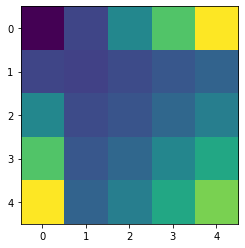

In [5]:
shells = [A1,A2,A3,A4,A5]
Ns = len(shells)

P = np.zeros((Ns,Ns))
for ai in range(Ns):
    for bi in range(Ns):
        P[ai,bi] = 1./(ai+1) + 4./(bi+1) + 5*(ai+bi)/(ai*bi+1) + ai * bi 
P += P.T
P /= np.sqrt(np.sum(P**2))
print('Density matrix:')
print(P)
_ = plt.imshow(P)
plt.show()

In [6]:
grad_n = np.zeros((Ns,3))
grad_e = np.zeros((Ns,3))
dx = 1.e-8

Exc0 = 0.
for ai in range(Ns):
    for bi in range(Ns):
        for ci in range(Ns):
            for di in range(Ns):
                a = shells[ai]
                b = shells[bi]
                c = shells[ci]
                d = shells[di]
                I = exc_1324_ssss( a,b,G, c,d,N, H )
                Exc0 += P[ai][bi] * P[ci][di] * I

o = 0                
for A in shells:
    for dd in [0,1,2]:
        ExcP = 0.
        for ai in range(Ns):
            for bi in range(Ns):
                for ci in range(Ns):
                    for di in range(Ns):
                        a = deepcopy(shells[ai])
                        b = deepcopy(shells[bi])
                        c = deepcopy(shells[ci])
                        d = deepcopy(shells[di])
                        if a.i == A.i: a.R[dd] += dx
                        I = exc_1324_ssss( a,b,G, c,d,N, H )
                        ExcP += P[ai][bi] * P[ci][di] * I
                        if a.i == A.i: a.R[dd] -= dx
        ExcM = 0.
        for ai in range(Ns):
            for bi in range(Ns):
                for ci in range(Ns):
                    for di in range(Ns):
                        a = deepcopy(shells[ai])
                        b = deepcopy(shells[bi])
                        c = deepcopy(shells[ci])
                        d = deepcopy(shells[di])
                        if a.i == A.i: a.R[dd] -= dx
                        I = exc_1324_ssss( a,b,G, c,d,N, H )
                        ExcM += P[ai][bi] * P[ci][di] * I
                        if a.i == A.i: a.R[dd] += dx
        
        best_val = (ExcP - ExcM) / dx / 2
        uppr_val = (ExcP - Exc0)/dx
        down_val = (Exc0 - ExcM)/dx
        grad_n[o][dd] = best_val
        grad_e[o][dd] = max(abs(best_val-uppr_val),abs(best_val-down_val))
    o += 1
    
print('Numerical Grad:')
print(grad_n)
print('+/-')
print(grad_e)
print()
print('Total grad:', np.sum(grad_n,axis=0))

Numerical Grad:
[[ 0.2702893   0.34149226  0.44766151]
 [-0.41312176 -0.32636303 -0.42051012]
 [ 0.04117613 -0.28343337  0.13855135]
 [-0.02360254 -0.00174198 -0.00304601]
 [ 0.12525883  0.27004612 -0.16265669]]
+/-
[[0.00000000e+00 0.00000000e+00 4.44089210e-08]
 [1.33226763e-07 0.00000000e+00 8.88178420e-08]
 [3.55271368e-07 1.77635684e-07 1.33226763e-07]
 [1.77635684e-07 8.88178420e-08 1.77635684e-07]
 [8.88178420e-08 1.77635684e-07 2.22044605e-07]]

Total grad: [-4.4408921e-08  0.0000000e+00  4.4408921e-08]


In [7]:
grad = np.zeros((Ns,3))
for ai in range(Ns):
    for bi in range(Ns):
        for ci in range(Ns):
            for di in range(Ns):
                a = shells[ai]
                b = shells[bi]
                c = shells[ci]
                d = shells[di]
                DI = exc_1324_grad_ssss( a,b,G, c,d,N, H )
                grad[ai] += ( P[ai][bi] * P[ci][di] ) * DI
                
print('Analytical Grad:')          
print(grad)
print()
print('Analytical / Numerical:')
print(grad / grad_n)
print()
print('Analytical - Numerical:')
print(grad - grad_n)
print()
print('Total grad:', np.sum(grad,axis=0))

ratio_check = np.any( np.abs(grad/grad_n)-1 > 0.001 )
diff__check = np.any( np.abs(grad-grad_n)   > 0.001 )
failed = diff__check or ratio_check
success = not failed

print()
print()
print('Grad check:', end=' ')
if success:
    print('PASS')
else:
    print('FAIL')
print()

Analytical Grad:
[[ 0.2702893   0.34149226  0.44766154]
 [-0.4131217  -0.32636298 -0.42051018]
 [ 0.04117616 -0.28343322  0.13855147]
 [-0.02360259 -0.00174207 -0.00304614]
 [ 0.12525882  0.27004602 -0.16265669]]

Analytical / Numerical:
[[1.         1.00000001 1.00000006]
 [0.99999986 0.99999985 1.00000015]
 [1.00000081 0.9999995  1.00000089]
 [1.00000183 1.00005174 1.00004283]
 [0.99999998 0.99999962 1.00000001]]

Analytical - Numerical:
[[-8.40891135e-10  3.59039115e-09  2.72057167e-08]
 [ 5.70869494e-08  4.76866442e-08 -6.32760402e-08]
 [ 3.33906878e-08  1.42616419e-07  1.23813743e-07]
 [-4.30772609e-08 -9.01228310e-08 -1.30462511e-07]
 [-2.15056428e-09 -1.03770623e-07 -1.68982905e-09]]

Total grad: [-8.32667268e-17 -5.55111512e-17  4.71844785e-16]


Grad check: PASS



In [8]:
shell_list = []
for s1 in shells:
    for s2 in shells:
        for s3 in shells:
            for s4 in shells:
                shell_list.append([s1,s2,s3,s4])

overall_success = True
for shell4 in shell_list:
    d_n = [0.,0.,0.]
    e_n = [0.,0.,0.]
    
    oS1 = deepcopy(shell4[0])
    oS2 = deepcopy(shell4[1])
    oS3 = deepcopy(shell4[2])
    oS4 = deepcopy(shell4[3])
    
    og = ssss_4c2e( oS1,oS2,G, oS3,oS4,N, H  )
    d_a = count_a_1( oS1,oS2,G, oS3,oS4,N, H )**0 * grad_ssss( oS1,oS2,G, oS3,oS4,N, H  )
            
    dx = 1.e-6 
    for d in [0,1,2]:

        tS1 = deepcopy(shell4[0])
        tS2 = deepcopy(shell4[1])
        tS3 = deepcopy(shell4[2])
        tS4 = deepcopy(shell4[3])
        
        tS1.R[d] += dx
        pr = ssss_4c2e( tS1,tS2,G, tS3,tS4,N, H )
        
        tS1.R[d] -= 2*dx
        mr = ssss_4c2e( tS1,tS2,G, tS3,tS4,N, H )

        tS1.R[d] += dx

        dp = (pr-og)/dx
        dm = (og-mr)/dx
        best_val = (pr-mr)/dx/2
        err = max(abs(best_val-dp),abs(best_val-dm))
        d_n[d] = best_val
        e_n[d] = err

    ratio_check = False
    d_n2 = np.sum([x**2 for x in d_n]) 
    d_a2 = np.sum([x**2 for x in d_a])
    if d_n2 > 1.e-6 or d_a2 > 1.e-6:
        ratio_check = np.any( np.abs(d_n/d_a-1) > 1.e-3 )
    diff__check = np.any( np.abs(d_n-d_a) > 1.e-3 )
    failed = diff__check or ratio_check
    success = not failed
    
    if not success:
        print(oS1.i , oS2.i , oS3.i , oS4.i, d_n, d_a )
        overall_success = False
        
print('All shells check:', end=' ')
if overall_success:
    print('PASS')
else:
    print('FAIL')

All shells check: PASS
